In [2]:
import pandas as pd

from sklearn.metrics import jaccard_score

In [3]:
results_df = preds = pd.read_csv(
    'https://raw.githubusercontent.com/greek-proverb-atlas/proverbs.gr/main/analysis/classification_seed2023.csv', 
    index_col=0)

results_df

,aa,lr,svm,knn,rf,text,gold,bert
100459,Evia,Λέσβος,Λέσβος,Λέσβος,Κύπρος,"Τι με μέλλει εμένα, για του Χατζιαλή τ' άρνια;",Θεσπρωτία,Θεσπρωτία
109640,Evia,Θράκη,Εύβοια,Ανατολική Θράκη,Ήπειρος,Ένα χρόνο κ' ένα μήνα έκαμ' ένα αδράχτι νήμα,Ανατολική Θράκη,Εύβοια
71246,Ioannina,Λέσβος,Λέσβος,Λέσβος,Λέσβος,Τι' κάν'ς Γιώργον; -Σκαντοχερία κάνου,Αιτωλία,Ιωάννινα
99588,Pontos,Πόντος,Πόντος,Κύπρος,Σκύρος,Άθρωπον το μαθάν' τσετίνεα απομαθάν',Πόντος,Πόντος
76332,Rodos,Ρόδος,Ρόδος,Ρόδος,Σκύρος,Τίσε μέλει που το πατσανά το χαψί γη λίον είνα...,Κάρπαθος,Κρήτη
...,...,...,...,...,...,...,...,...
102085,Karpathos,Αρκαδία,Κάρπαθος,Κεφαλληνία,Αρκαδία,Το ξένε μες στο σπίτι σου για μάρτυρα τεν έχεις,Σκύρος,Κρήτη
52994,Heptanese,Επτάνησος,Επτάνησος,Αχαΐα,Αχαΐα,"Του φαίνεται πως ευτός είναι, κι άλλος δεν είναι",Αχαΐα,Αμοργός
116801,East Thrace,Θεσπρωτία,Ανατολική Θράκη,Κρήτη,Θεσπρωτία,"Ποιος θα παινέση το γαμπρό; Η νύφη, αν είναι κ...",Κρήτη,Θεσπρωτία
7368,Rodos,Αμοργός,Ρόδος,Αμοργός,Αμοργός,"Αν ήταν η δουλειά καλή, έκαμέν την κι ο καδής",Ρόδος,Ρόδος


## Where Do BERT and Logistic Regression Agree?

* Get the subset where BERT and Logistic Regression agree.

In [4]:
results_bert_lr_same = results_df[results_df['bert'] == results_df['lr']]
results_bert_lr_same = results_bert_lr_same[['bert', 'lr', 'gold', 'text']]
results_bert_lr_same

,bert,lr,gold,text
99588,Πόντος,Πόντος,Πόντος,Άθρωπον το μαθάν' τσετίνεα απομαθάν'
21925,Αμοργός,Αμοργός,Αμοργός,Εμπρός από τον διάβολον τρείς μέρες γεννημένος
24786,Αμοργός,Αμοργός,Αμοργός,Όνειρον είδες που δεν ξεδιαλύνει
71049,Ιωάννινα,Ιωάννινα,Λακωνία,Στου κασσιδιάρ' του κεφάλ' ούλοι μπαρμπέρ' δες...
38690,Ανατολική Θράκη,Ανατολική Θράκη,Αρκαδία,"Εχάσαμε τα μάτια, θα φυλάξουμε τ΄ αφρύδια;"
...,...,...,...,...
94996,Πόντος,Πόντος,Πόντος,Εθαρρείς κι έσκισες το μήλον κ' εποίκες α δύο
115356,Σκύρος,Σκύρος,Εύβοια,Αλλού τ' όνειρο τσ' αλλού το θάμα
4045,Πόντος,Πόντος,Πόντος,Τη Κουκουλίτ' ο γάμον
116801,Θεσπρωτία,Θεσπρωτία,Κρήτη,"Ποιος θα παινέση το γαμπρό; Η νύφη, αν είναι κ..."


* Count the loci of agreement.

In [5]:
results_bert_lr_same_gold_vc = results_bert_lr_same['gold'].value_counts()
results_bert_lr_same_gold_vc

gold
Κύπρος             17
Σκύρος             15
Πόντος             13
Αχαΐα              12
Ιωάννινα           10
Κάρπαθος           10
Κρήτη               9
Ρόδος               9
Νάξος               9
Αμοργός             8
Λέσβος              8
Μακεδονία           8
Αρκαδία             8
Επτάνησος           8
Ανατολική Θράκη     7
Θεσπρωτία           7
Εύβοια              6
Λακωνία             6
Κεφαλληνία          5
Αιτωλία             5
Ήπειρος             5
Θράκη               5
Μικρά Ασία          4
Name: count, dtype: int64

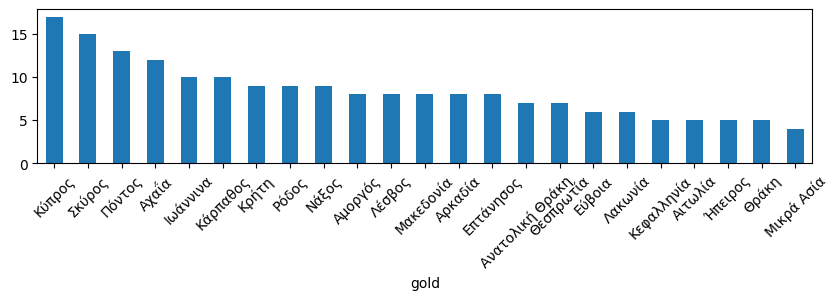

In [6]:
_ = results_bert_lr_same_gold_vc.plot.bar(figsize=(10,2), rot=45)

## Where Do BERT and Logistic Regression Disagree?

* Get the subset where BERT and Logistic Regression disagree.

In [7]:
results_bert_lr_diff = results_df[results_df['bert'] != results_df['lr']]
results_bert_lr_diff

,aa,lr,svm,knn,rf,text,gold,bert
100459,Evia,Λέσβος,Λέσβος,Λέσβος,Κύπρος,"Τι με μέλλει εμένα, για του Χατζιαλή τ' άρνια;",Θεσπρωτία,Θεσπρωτία
109640,Evia,Θράκη,Εύβοια,Ανατολική Θράκη,Ήπειρος,Ένα χρόνο κ' ένα μήνα έκαμ' ένα αδράχτι νήμα,Ανατολική Θράκη,Εύβοια
71246,Ioannina,Λέσβος,Λέσβος,Λέσβος,Λέσβος,Τι' κάν'ς Γιώργον; -Σκαντοχερία κάνου,Αιτωλία,Ιωάννινα
76332,Rodos,Ρόδος,Ρόδος,Ρόδος,Σκύρος,Τίσε μέλει που το πατσανά το χαψί γη λίον είνα...,Κάρπαθος,Κρήτη
52380,East Thrace,Μικρά Ασία,Ανατολική Θράκη,Λέσβος,Κρήτη,"Το κατσίκι έχει τη νουρά ψηλά και όταν πνιγή, ...",Αχαΐα,Λακωνία
...,...,...,...,...,...,...,...,...
17098,Naxos,Αμοργός,Νάξος,Νάξος,Επτάνησος,"Τα μικρά δεν ήθελες τα μεγάλα ΄ύρευγες, τράβα,...",Νάξος,Κάρπαθος
34186,Heptanese,Επτάνησος,Επτάνησος,Επτάνησος,Κεφαλληνία,"Οι ρωμιοί δε συμφωνούνε, πάρ' άντας θε να κατο...",Επτάνησος,Κεφαλληνία
102085,Karpathos,Αρκαδία,Κάρπαθος,Κεφαλληνία,Αρκαδία,Το ξένε μες στο σπίτι σου για μάρτυρα τεν έχεις,Σκύρος,Κρήτη
52994,Heptanese,Επτάνησος,Επτάνησος,Αχαΐα,Αχαΐα,"Του φαίνεται πως ευτός είναι, κι άλλος δεν είναι",Αχαΐα,Αμοργός


* Count the loci of disagreement.

In [8]:
results_bert_lr_diff_gold_vc = results_bert_lr_diff['gold'].value_counts()
results_bert_lr_diff_gold_vc

gold
Αρκαδία            23
Κεφαλληνία         22
Κρήτη              21
Λακωνία            21
Αχαΐα              20
Θράκη              20
Αιτωλία            19
Ιωάννινα           19
Μακεδονία          19
Κάρπαθος           18
Ήπειρος            18
Ανατολική Θράκη    17
Λέσβος             16
Θεσπρωτία          15
Επτάνησος          15
Νάξος              15
Σκύρος             15
Μικρά Ασία         14
Αμοργός            14
Εύβοια             14
Ρόδος              13
Κύπρος              7
Πόντος              6
Name: count, dtype: int64

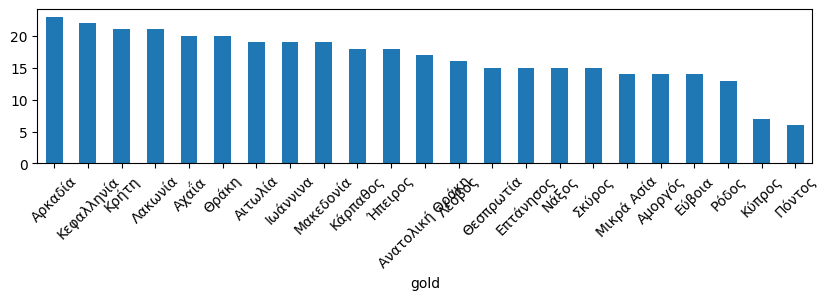

In [9]:
_ = results_bert_lr_diff_gold_vc.plot.bar(figsize=(10,2), rot=45)

* When BERT and Logistic Regression disagree, where is BERT correct?

In [10]:
results_bert_lr_diff_bert_ok = results_bert_lr_diff[
    results_bert_lr_diff['bert'] == results_bert_lr_diff['gold']
]
results_bert_lr_diff_bert_ok_vc = results_bert_lr_diff_bert_ok['gold']\
    .value_counts()
results_bert_lr_diff_bert_ok_vc

gold
Αχαΐα              9
Κεφαλληνία         8
Ιωάννινα           7
Ανατολική Θράκη    6
Θράκη              5
Αμοργός            5
Κρήτη              4
Σκύρος             4
Κάρπαθος           4
Κύπρος             3
Λακωνία            3
Μακεδονία          3
Ρόδος              3
Αιτωλία            3
Εύβοια             2
Θεσπρωτία          2
Νάξος              2
Λέσβος             2
Αρκαδία            2
Μικρά Ασία         2
Επτάνησος          1
Name: count, dtype: int64

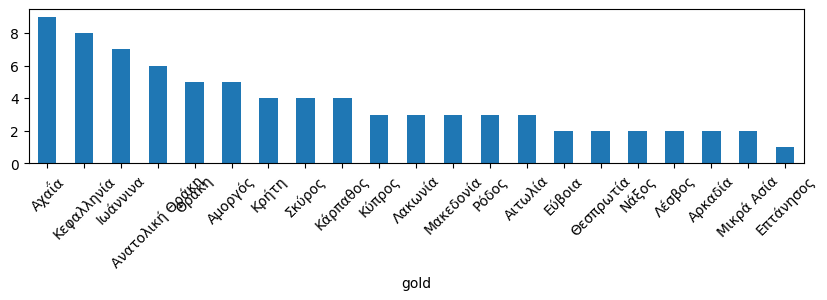

In [11]:
_ = results_bert_lr_diff_bert_ok_vc.plot.bar(figsize=(10,2), rot=45)

* Check how often the other models agree between themselves (and
  therefore with Logistic Regression), when BERT is correct and
  Logistic Regression is not.

In [12]:
results_bert_lr_diff_bert_ok.head(10)

,aa,lr,svm,knn,rf,text,gold,bert
100459,Evia,Λέσβος,Λέσβος,Λέσβος,Κύπρος,"Τι με μέλλει εμένα, για του Χατζιαλή τ' άρνια;",Θεσπρωτία,Θεσπρωτία
22087,Arcadia,Κρήτη,Κρήτη,Κρήτη,Σκύρος,Εσύ σαι δάσκαλος των δασκάλων,Αμοργός,Αμοργός
101843,Etolia,Λέσβος,Λέσβος,Αιτωλία,Ιωάννινα,Σα δε σ' αρέσ' πάρ' τ' βόλτα σου,Σκύρος,Σκύρος
48588,Heptanese,Ήπειρος,Αχαΐα,Επτάνησος,Αχαΐα,Η ζωή του κρέμεται σε μια κλωνά!,Αχαΐα,Αχαΐα
5930,Evia,Αχαΐα,Αχαΐα,Λέσβος,Εύβοια,Όταν ψάλλ' ο θειός τη θειά σου συ κατσούλωνε τ...,Μικρά Ασία,Μικρά Ασία
41861,Crete,Εύβοια,Εύβοια,Αμοργός,Αμοργός,Όποιο χέρι κοψ' η κρίσι δεν πονεί,Ιωάννινα,Ιωάννινα
40230,Cyprus,Ρόδος,Ρόδος,Αρκαδία,Θεσπρωτία,Τες πομπές τες δικές σου δεν τις βλέπεις,Αρκαδία,Αρκαδία
100727,Arcadia,Ήπειρος,Αρκαδία,Κύπρος,Θράκη,Αγοραστό – λιμαστό,Σκύρος,Σκύρος
52379,Arcadia,Μικρά Ασία,Αρκαδία,Αρκαδία,Αχαΐα,Το καρύδι φαίνεται απ' έξω γιερό! Ξέρεις τι έχ...,Αχαΐα,Αχαΐα
117966,Thesprotia,Αιτωλία,Νάξος,Θεσπρωτία,Αχαΐα,Ζοράκι Χστός ανέστ,Θράκη,Θράκη


In [13]:
round(results_bert_lr_diff_bert_ok.apply(lambda x: len(set(x[1:5]))==1, 
                                         axis=1).mean()*100, 2)

5.0

* When BERT and Logistic Regression disagree, where is Logistic
  Regression correct?

In [14]:
results_bert_lr_diff_lr_ok = results_bert_lr_diff[
    results_bert_lr_diff['lr'] == results_bert_lr_diff['gold']
]
results_bert_lr_diff_lr_ok_vc = results_bert_lr_diff_lr_ok['gold']\
    .value_counts()
results_bert_lr_diff_lr_ok_vc

gold
Αιτωλία            9
Επτάνησος          8
Λέσβος             7
Ήπειρος            4
Σκύρος             4
Μακεδονία          4
Αρκαδία            3
Νάξος              3
Κρήτη              3
Πόντος             2
Ανατολική Θράκη    2
Ιωάννινα           2
Κάρπαθος           2
Λακωνία            2
Αμοργός            1
Κεφαλληνία         1
Κύπρος             1
Θράκη              1
Name: count, dtype: int64

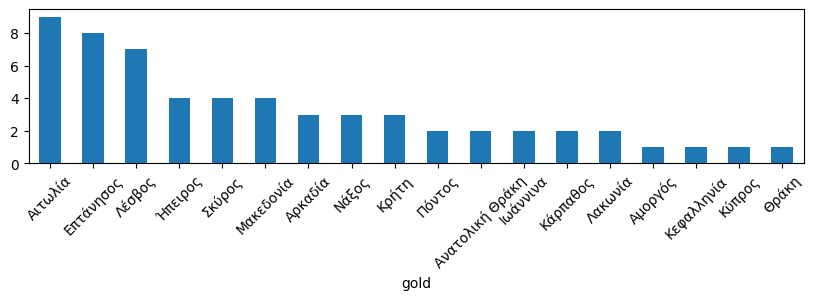

In [15]:
_ = results_bert_lr_diff_lr_ok_vc.plot.bar(figsize=(10,2), rot=45)

* Check how often the other models agree with Logistic Regression,
  when Logistic Regression is correct and BERT is not.

In [16]:
results_bert_lr_diff_lr_ok.head(10)

,aa,lr,svm,knn,rf,text,gold,bert
20448,Naxos,Αμοργός,Αμοργός,Αμοργός,Ιωάννινα,Ανάθεμα που πίστευγε στων αδερφιών τ' αμάχι,Αμοργός,Κεφαλληνία
15441,Crete,Νάξος,Νάξος,Νάξος,Νάξος,Η αμαρτία θάνατο 'εννά,Νάξος,Ήπειρος
107223,Maced.,Λέσβος,Αιτωλία,Ανατολική Θράκη,Αιτωλία,“Διώξι μι γι θα σί διώξου” λέγ' η αράχνη,Λέσβος,Αιτωλία
70044,Thesprotia,Αιτωλία,Κύπρος,Κύπρος,Λέσβος,Μ' κίνει κουτσουπρυόβουλους,Αιτωλία,Ιωάννινα
61479,Thesprotia,Αρκαδία,Επτάνησος,Επτάνησος,Λακωνία,Έχει μυαλό από φελλό,Αρκαδία,Θεσπρωτία
109536,East Thrace,Ανατολική Θράκη,Ανατολική Θράκη,Νάξος,Ανατολική Θράκη,Γω τόσα τον σκύλο μου κι ο σκύλος την ουρά του,Ανατολική Θράκη,Μικρά Ασία
105383,East Thrace,Αρκαδία,Μακεδονία,Ανατολική Θράκη,Νάξος,Αντάρα και σιαντάρα κατσιαχούρχουρη γαϊδάρα!,Αρκαδία,Αχαΐα
102223,Kefalinia,Σκύρος,Σκύρος,Εύβοια,Σκύρος,"Ως τ' Άη-Γιαννιού, τρζυγώνα, εν η φούρζα του χ...",Σκύρος,Κύπρος
899,Lesvos,Λέσβος,Λέσβος,Λέσβος,Αιτωλία,Σα ντρέπισι να βάλς ένα κόσινου μπρουστά σ',Λέσβος,Ιωάννινα
30546,Heptanese,Επτάνησος,Επτάνησος,Λέσβος,Αμοργός,Από λόγον το λόγο,Επτάνησος,Αμοργός


In [17]:
round(results_bert_lr_diff_lr_ok.apply(lambda x: len(set(x[1:5]))==1, 
                                       axis=1).mean()*100, 2)

25.42

## How Similar Are the Predictions?

* Check how similar the predictions of BERT and Logistic Regression
  are, regardless of whether they are right or wrong.

In [18]:
jaccard_scores = jaccard_score(results_df['bert'], 
                               results_df['lr'], 
                               average=None)
jaccard_scores

array([0.08108108, 0.19565217, 0.21153846, 0.20967742, 0.10204082,
       0.2195122 , 0.17307692, 0.11428571, 0.16666667, 0.17142857,
       0.16129032, 0.18421053, 0.19642857, 0.21428571, 0.58064516,
       0.175     , 0.08333333, 0.17241379, 0.07692308, 0.26190476,
       0.5       , 0.18421053, 0.33333333])

In [19]:
for name, score in zip(results_df['bert'].unique(), jaccard_scores):
    print(f"{name}: {score}") 

Θεσπρωτία: 0.08108108108108109
Εύβοια: 0.1956521739130435
Ιωάννινα: 0.21153846153846154
Πόντος: 0.20967741935483872
Κρήτη: 0.10204081632653061
Αμοργός: 0.21951219512195122
Λακωνία: 0.17307692307692307
Κεφαλληνία: 0.11428571428571428
Ανατολική Θράκη: 0.16666666666666666
Σκύρος: 0.17142857142857143
Θράκη: 0.16129032258064516
Αχαΐα: 0.18421052631578946
Ρόδος: 0.19642857142857142
Ήπειρος: 0.21428571428571427
Κάρπαθος: 0.5806451612903226
Αιτωλία: 0.175
Αρκαδία: 0.08333333333333333
Κύπρος: 0.1724137931034483
Μακεδονία: 0.07692307692307693
Επτάνησος: 0.2619047619047619
Λέσβος: 0.5
Μικρά Ασία: 0.18421052631578946
Νάξος: 0.3333333333333333


In [20]:
weighted_jaccard_score = jaccard_score(results_df['bert'], 
                                       results_df['lr'], 
                                       average='weighted')
round(weighted_jaccard_score, 2)

0.21

## How Likely is One Model to Be Correct Given that the Other Model Is Correct?

In [21]:
results_bert_ok = results_df[results_df['bert'] == results_df['gold']]
round((results_bert_ok['lr'] == results_bert_ok['bert']).mean()*100, 2)

59.39

In [22]:
results_lr_ok = results_df[results_df['lr'] == results_df['gold']]
round((results_lr_ok['bert'] == results_lr_ok['lr']).mean()*100, 2)

66.48